# Convex Optimization – Homework 2
Made by Kristian Kuznetsov

## Task 1

**(1.2)** We have $f(x) = \exp{(x^T Ax)}$, where $A \in S_+^n$. Let's look at the differentials:

$$df(x) = e^{x^TAx} d(Ax, x) = e^{x^TAx} (A+A^T x, dx) = e^{x^TAx} (2Ax, dx) \quad \Rightarrow \quad \nabla f(x) =  e^{x^TAx} 2Ax$$
$$d^2f(x) = d(e^{x^TAx})(2Ax, dx_1) + e^{x^TAx} (d(2Ax), dx_1) = e^{x^TAx}(2Ax, dx_2)(2Ax, dx_1) +  e^{x^TAx} (Adx_2, dx_1) =$$
$$ = 2e^{x^TAx} ((2Axx^TA + A)dx_1 , dx_2) \quad \Rightarrow \quad \nabla^2 f(x) = 2e^{x^TAx} (2Axx^TA + A) $$

Due to second order condition, $f(x)$ is convex if $\nabla^2 f(x)$ is positive semidefinite for all $x$. Let's check: $v^T \nabla^2{f} v = v^T 2e^{x^TAx} (2Axx^TA + A) v = 2e^{x^TAx} (2v^TAxx^TAv + v^TAv)$. $2e^{x^TAx}$ is positive, $v^TAv \geq 0$ as $A \in S_+^n$. $v^TAxx^TAv = (x^TAv)^T (x^TAv) = (x^TAv)^2 \geq 0$. Then $v^T \nabla^2{f} v \geq 0$ and $\nabla^2{f(x)}$ is positive semidefinite, $f(x)$ is convex.

We can also prove this via the compostion rule. We know that composition of two convex functions is convex. We have $\exp{u}$ which is convex, and quadratic form $x^T Ax$, where $A \in S_+^n$, which is also convex. Then $\exp{(x^T Ax)}$ is convex.



**(1.3)** We want to check the function $f(X) = tr{(X^{-1})}$, where $X \in S_{++}$. We can restrict the function to a line by $X = Z + tV$, where $Z \in S_{++}$ and $V \in S$, $t \geq 0$. Then 
$$g(t) = tr((Z + tV)^{-1}) = tr((Z^{1/2} Z^{1/2} + tV)^{-1}) = tr(Z^{-1/2}( I  + tZ^{-1/2}V Z^{-1/2})^{-1} Z^{-1/2}) = tr(Z^{-1}( I  + tZ^{-1/2}V Z^{-1/2})^{-1})$$

$Z^{-1/2}V Z^{-1/2}$ is symmetric because  $(Z^{-1/2}V Z^{-1/2})^T = Z^{-1/2}V Z^{-1/2}$, then we can use eigendecomposition $Z^{-1/2}V Z^{-1/2} = Q\Lambda Q^T$, where $Q$ is unitary, $\Lambda$ is diagonal with eigenvalues of $Z^{-1/2}V Z^{-1/2}$.

$$g(t) = tr(Z^{-1}( I  + tQ\Lambda Q^T)^{-1}) = tr(Z^{-1}( QQ^T  + tQ\Lambda Q^T)^{-1}) = tr(Z^{-1}Q^T(I  + t\Lambda)^{-1}Q) = tr(QZ^{-1}Q^T(I  + t\Lambda)^{-1}) = \sum_i (QZ^{-1}Q)_{ii} \dfrac{1}{1+t\lambda_i}$$

We know that $Z^{-1} \in S_{++}$ then its eigenvalues are positive. $QZ^{-1}Q^T$ is similarity transform, so the eigenvalues don't change. Then all eigenvalues of $QZ^{-1}Q^T$ are positive and the matrix is in $S_{++}$. Then all diagonal elements $(QZ^{-1}Q)_{ii}$ are positive. Then

$$\dfrac{d^2g}{dt^2} = \sum_i (QZ^{-1}Q)_{ii} \dfrac{2\lambda_i^2}{(1+t\lambda_i)^3} > 0$$

Due to the second order condition $g(t)$ is convex. And by the theorem about restricting a function to a line $f(X)$ is also convex.

## Task 2

Использовал этот туториал https://remilepriol.github.io/dualityviz/

In [3]:
import numpy as np
import cvxpy as cvx
import matplotlib.pylab as plt

%matplotlib inline

In [171]:
def convex_conjugate(x_space, y_space):
    convex_conjugate_y = [np.max(z*x - y_space) for z in x_space]
    return convex_conjugate_y

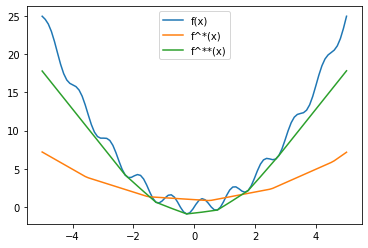

In [177]:
k = 5
x = np.linspace(-k, k, 100)
function = lambda x: x**2 + np.sin(2* np.pi * x)
y_func = function(x)

convex_conjugate_y = convex_conjugate(x, y_func)
convex_biconjugate_y = convex_conjugate(x, y_conj_func)

plt.plot(x, y_func, label = 'f(x)')
plt.plot(x, convex_conjugate_y, label = 'f^*(x)')
plt.plot(x, convex_biconjugate_y, label = 'f^**(x)')
plt.legend()

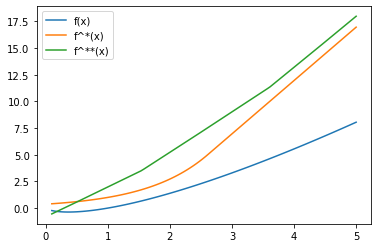

In [180]:
k = 5
x = np.linspace(0.1, k, 100)
function = lambda x: x * np.log(x)
y_func = function(x)

convex_conjugate_y = convex_conjugate(x, y_func)
convex_biconjugate_y = convex_conjugate(x, y_conj_func)

plt.plot(x, y_func, label = 'f(x)')
plt.plot(x, convex_conjugate_y, label = 'f^*(x)')
plt.plot(x, convex_biconjugate_y, label = 'f^**(x)')
plt.legend()

## Task 12

We have a polyhedra $P = \{x \mid A^Tx \leq b\}$  and we want to find the largest ball $B(x_c, r) = \{x \mid \|x - x_c \|_2 \leq r\}$. We can also rewrite ball definition as $B(x_c, r) = \{x_c + u \mid \|u\|_2 \leq r \}$

The ball must be inside polyhedra, it means that it must be inside the intersection of the halfspaces $a_i^Tx \leq b_i$. We use the definition of the ball: $a_i^T (x_c + u) = a_i^T x_c + a_i^T u \leq b_i$. From the inequality $a_i^T u \leq \|a_i\|_2 \|u\|_2$ and the constraint on u from the ball $\|u\|_2 \leq r$ we get:

$$a_i^T x_c + a_i^T u \leq a_i^T x_c + r \|a_i\|_2 \leq b_i$$

Now we have a problem: 
$$
\begin{aligned}
& \underset{x_c, r}{\text{minimize}}
& & r \\
& \text{subject to}
& & a_i^T x_c + r \|a_i\|_2 \leq b_i
\end{aligned}
$$

We can create new vectors $z = \begin{bmatrix}x_c \\ z\end{bmatrix}$, $c = \begin{bmatrix}0 \\ 1\end{bmatrix}$  and a new matrix $G = 
\begin{bmatrix}a_1 & \|a_1\|_2 \\ a_2 & \|a_2\|_2 \\ \vdots & \vdots \\ a_n & \|a_n\|_2 \end{bmatrix}$. Then the problem can be written as a Linear Programming problem:

$$
\begin{aligned}
& \underset{z}{\text{minimize}}
& & c^T z \\
& \text{subject to}
& & Gz \leq b
\end{aligned}
$$

## Task 13

This problem has unique solution due to the thoerem that minimizing convex function over convex region has unique minimizer. Our function is quadratic, so it is convex. Constraints are just ball, so the region is convex. Then the problem has unique minimizer.

To solve this problem we will use KKT conditions. Firstly, define the Lagrangian:

$$L(x, \lambda) = \dfrac{1}{2} x^T H x + c^T x + \dfrac{\lambda}{2} (x^Tx - r^2)$$

$$\nabla_x L = Hx + c + \lambda x = 0 \qquad \Rightarrow \qquad x^* = - (H + \lambda I)^{-1} c$$

On the other hand, as the function and region are convex, the optimal point is either located inside the region and is stationary point of the objective function, or located on the border of the region. So in the first case $\lambda = 0$ because we need only $\nabla f(x) = Hx + c = 0$ and $x^* = - H^{-1} c$. Then we plug optimal points into the constraints and get that if $\|H^{-1}c\|_2 \leq r$ then $\lambda = 0$ and $\|(H + \lambda I)^{-1}c\|_2 = r$ in case of point in the border.

## Task 14

We want to solve the following problem:
$$
\begin{aligned}
& \underset{X}{\text{minimize}}
& & \dfrac{1}{2} tr(X^TQX) + tr(B^TX) \\
& \text{subject to}
& & \|X\|_F^2 = 1
\end{aligned}
$$

where $X \in \mathbb{R}^{m \times n}$, $Q \in S^m_{++}$, $B \in \mathbb{R}^{m \times n}$, $n < m$

We will reduce this problem to a standard QCQP problem. As $Q \in S_{++}$ we can use SVD and write $Q = U \Sigma U^T$. Then $tr(X^TQX) = tr(X^TU \Sigma U^T X) = tr((U^TX)^T \Sigma U^T X) = tr(Z^T \Sigma U^T Z)$ if we replace $Z = U^TX$. Also if $Z = U^TX$ then $X = UX$ and $\|X\|^2_F = \|UZ\|^2_F =  \|Z\|^2_F$ as Frobenius norm is unitary invariant. Then we have

$$
\begin{aligned}
& \underset{Z}{\text{minimize}}
& & \dfrac{1}{2} tr(Z^T \Sigma Z) + tr(B^T UZ) \\
& \text{subject to}
& & \|Z\|_F^2 = 1
\end{aligned}
$$

Let's apply vectorization and say that $z = vec(Z)$, $c = vec(B^TU)$ and introduce block diagonal matrix $D = diag(\Sigma, \Sigma, ..., \Sigma)$ where there is $m$ matrices $\Sigma$. We get

$$
\begin{aligned}
& \underset{z}{\text{minimize}}
& & \dfrac{1}{2} z^T D z + c^T z \\
& \text{subject to}
& & \|z\|_F^2 = 1
\end{aligned}
$$

It is already a QP problem, but we can reduce the number of variables. For that purpose we firstly reorder elements of vectors and matrices so that we got similar singular values ordered $\tilde{D} = diag(\underbrace{\sigma_1, \sigma_1, ..., \sigma_1}_{n}, \sigma_2, ...)$:

$$
\begin{aligned}
& \underset{z}{\text{minimize}}
& & \dfrac{1}{2} \tilde{z}^T \tilde{D} \tilde{z} + \tilde{c}^T \tilde{z} \\
& \text{subject to}
& & \|\tilde{z}\|_F^2 = 1
\end{aligned}
$$

Then for each singular value of $Q$ we can apply the following operation. Let's consider $\sigma_1$ and the corresponding slices $\tilde{z}_{1:n}$ and fix other variables treating them like constants. Then $\tilde{z}_{1:n}^T \tilde{D_{1:n}} \tilde{z}_{1:n} = \sigma_1 \|\tilde{z}_{1:n}\|^2_2$. Then our subproblem is:

$$
\begin{aligned}
& \underset{z}{\text{minimize}}
& & \dfrac{1}{2} \sigma_1 \|\tilde{z}_{1:n}\|^2_2 + const + \tilde{c}_{1:n}^T \tilde{z}_{1:n}  \\
& \text{subject to}
& & \|\tilde{z}_{1:n}\|_F^2 + const = 1
\end{aligned}
\qquad \Rightarrow \qquad 
\begin{aligned}
& \underset{z}{\text{minimize}}
& & \tilde{c}_{1:n}^T \tilde{z}_{1:n}  \\
& \text{subject to}
& & \|\tilde{z}_{1:n}\|_F^2  = d_1
\end{aligned}
$$


The solution for this subproblem is $\tilde{z}_{1:n} = \dfrac{-d_1}{\|\tilde{c}_{1:n}\|} \tilde{c}_{1:n}$. Then we update our variable vector as $\begin{bmatrix}-d_1 \\ \tilde{z}_{n+1} \\  \tilde{z}_{n+2} \\ \vdots \end{bmatrix}$ and our linear part vector as $\begin{bmatrix} \|\tilde{c}_{1:n}\| \\ \tilde{c}_{n+1} \\  \tilde{c}_{n+2} \\ \vdots \end{bmatrix}$

Then our new variable vector $d = \begin{bmatrix}-d_1 \\ -d_2 \\  \vdots \\ -d_m \end{bmatrix}$ and $b = \begin{bmatrix} |\tilde{c}_{1:n}\| \\ |\tilde{c}_{n+1:2n}\| \\  \vdots \\ |\tilde{c}_{(m-1)n+1:mn}\| \end{bmatrix}$

$$
\begin{aligned}
& \underset{d}{\text{minimize}}
& & \dfrac{1}{2} d^T \Sigma d + b^T d \\
& \text{subject to}
& & \|d\|_F^2  = 1
\end{aligned}
$$

We will use the fact from the previous task and find the optimal solution as $d^* = - (\Sigma + \lambda I)^{-1} b$ while $\|(\Sigma + \lambda I)^{-1}b\| = 1$.